In [1]:
#import library
import numpy as np #Library untuk operasi array dan matriks.
import matplotlib.pyplot as plt #Library untuk visualisasi data.
%matplotlib inline 
import cv2 # Library OpenCV untuk pengolahan citra.
import matplotlib.image as mpimg #Library untuk membaca dan menampilkan citra.
from skimage import data # Library untuk mengakses data citra bawaan.

In [2]:
#Read Image
img = cv2.imread("anakgajah.jpg") #  untuk membaca citra "anakgajah.jpg" dan menyimpannya ke variabel 
# Convert Image to Grayscale
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #untuk mengonversi citra dari BGR (Blue-Green-Red) ke grayscale.

In [3]:
#Penerapan Histogram Equalization (HE)
image_equalized = cv2.equalizeHist(image) #untuk menerapkan Histogram Equalization pada citra grayscale. 

In [4]:
#Penerapan Metode Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8)) 
#untuk membuat objek CLAHE. 
#clipLimit, diberikan nilai 2 yang merupakan batasan kontras yang akan diterapkan pada histogram.
# tileGridSize, diberikan nilai (8,8) yang menentukan ukuran grid untuk membagi citra menjadi beberapa bagian yang akan diterapkan CLAHE.

#Apply CLAHE to the original image
image_clahe = clahe.apply(image) #Menggunakan metode apply pada objek CLAHE yang telah dibuat sebelumnya untuk menerapkan CLAHE pada citra grayscale image.

In [5]:
#Penerapan metode Contrast Stretching (CS)
# Create an empty array to store the final output
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8') #Membuat array kosong image_cs dengan ukuran yang sama dengan citra asli.

# Apply Min-Max Contrasting
min = np.min(image) #maka piksel pada citra img1 di set menjadi 255 (putih), jika tidak, maka di set menjadi 0 (hitam).
max = np.max(image)

for i in range(image.shape[0]): #untuk mengiterasi setiap elemen citra asli.
    for j in range(image.shape[1]):
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min) #Menghitung nilai baru untuk setiap elemen citra menggunakan metode Contrast Stretching dan menyimpannya dalam image_cs.

In [6]:
#Penerapan Metode Perkalian Konstanta
copyCamera = image.copy().astype(float) #Membuat salinan citra asli copyCamera dalam format float.

m1,n1 = copyCamera.shape
output1 = np.empty([m1, n1]) #untuk membuat array kosong dengan ukuran yang sama dengan citra

#digunakan untuk mengiterasi setiap piksel dalam citra. 
for baris in range(0, m1-1): #untuk mengakses setiap posisi piksel dalam citra.
    for kolom in range(0, n1-1): #untuk mengakses setiap posisi piksel dalam citra.
        a1 = baris #digunakan sebagai indeks untuk menyimpan hasil perkalian dalam array 
        b1 = kolom #digunakan sebagai indeks untuk menyimpan hasil perkalian dalam array 
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9 #Melakukan perkalian setiap elemen citra dengan konstanta 1.9 dan menyimpan hasilnya dalam output1.

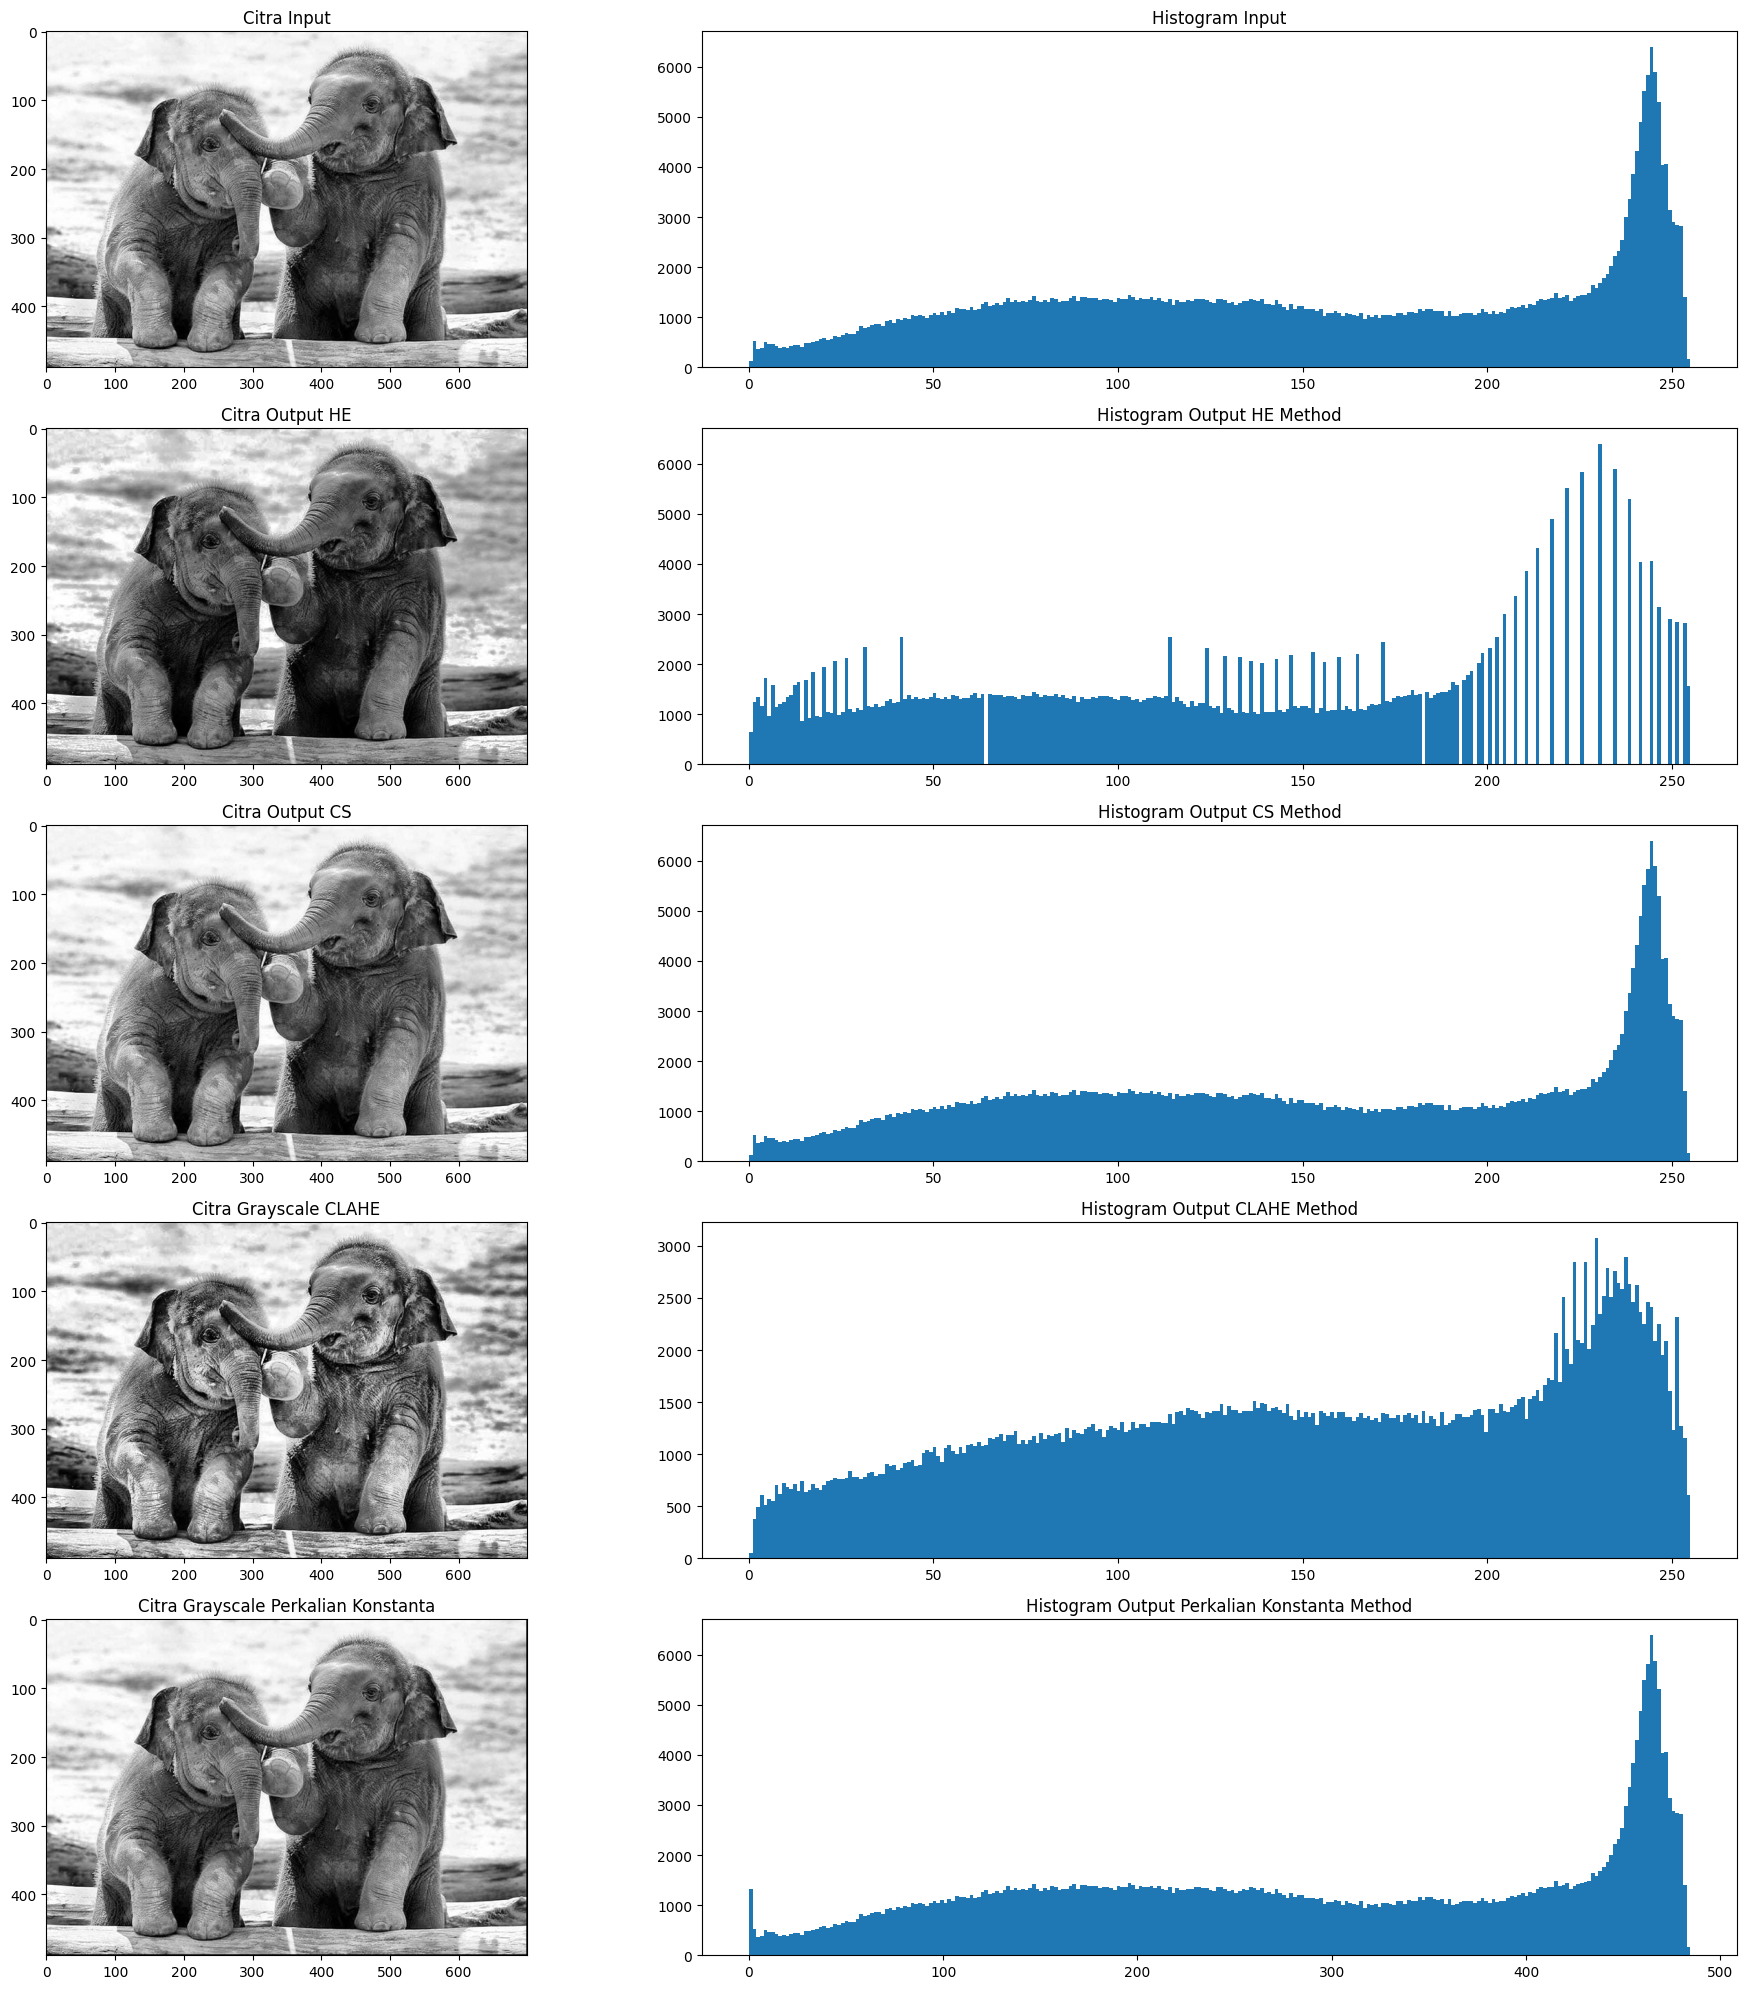

In [7]:
#plot image
fig, axes = plt.subplots(5, 2, figsize=(20, 20)) #Membuat subplot dengan 5 baris dan 2 kolom 
ax = axes.ravel() #untuk meratakan array dari objek axes menjadi 1 dimensi dan disimpan dalam variabel ax.

ax[0].imshow(image, cmap=plt.cm.gray) # untuk menampilkan citra pada setiap subplot.
ax[0].set_title("Citra Input") #untuk memberikan judul pada setiap subplot.
ax[1].hist(image.ravel(), bins=256) #untuk menampilkan histogram pada setiap subplot.
ax[1].set_title('Histogram Input') #untuk memberikan judul pada setiap subplot.

ax[2].imshow(image_equalized, cmap=plt.cm.gray) # untuk menampilkan citra pada setiap subplot.
ax[2].set_title("Citra Output HE") #untuk memberikan judul pada setiap subplot.
ax[3].hist(image_equalized.ravel(), bins=256) #untuk menampilkan histogram pada setiap subplot.
ax[3].set_title('Histogram Output HE Method') #untuk memberikan judul pada setiap subplot.

ax[4].imshow(image_cs, cmap=plt.cm.gray) # untuk menampilkan citra pada setiap subplot.
ax[4].set_title("Citra Output CS") #untuk memberikan judul pada setiap subplot.
ax[5].hist(image_cs.ravel(), bins=256) #untuk menampilkan histogram pada setiap subplot.
ax[5].set_title('Histogram Output CS Method') #untuk memberikan judul pada setiap subplot.

ax[6].imshow(image_clahe, cmap=plt.cm.gray) # untuk menampilkan citra pada setiap subplot.
ax[6].set_title("Citra Grayscale CLAHE") #untuk memberikan judul pada setiap subplot.
ax[7].hist(image_clahe.ravel(), bins=256) #untuk menampilkan histogram pada setiap subplot.
ax[7].set_title('Histogram Output CLAHE Method') #untuk memberikan judul pada setiap subplot.

ax[8].imshow(output1, cmap=plt.cm.gray) # untuk menampilkan citra pada setiap subplot.
ax[8].set_title("Citra Grayscale Perkalian Konstanta") #untuk memberikan judul pada setiap subplot.
ax[9].hist(output1.ravel(), bins=256)  #untuk menampilkan histogram pada setiap subplot.
ax[9].set_title('Histogram Output Perkalian Konstanta Method') #untuk memberikan judul pada setiap subplot.

fig.tight_layout() #untuk menyusun tata letak subplot agar sesuai dan tidak tumpang tindih.

